In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Netflix Movies and TV Shows Data dataset
data= pd.read_csv('/Users/swapnilgadage/Documents/DataAnalytics/Achivment 6/netflix_titles.csv' )

# Display the first few rows of the dataset
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Fill null values in numerical columns with mean

data['director'].fillna(data['director'].mode()[0], inplace=True)
data['cast'].fillna(data["cast"].mode()[0], inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace=True)
data["date_added"].fillna(data['date_added'].mode()[0], inplace=True)
data['rating'].fillna(data['rating'].mode()[0],inplace=True)
data['duration'].fillna(data['duration'].mode()[0],inplace=True)

# Check if there are any remaining null values
null_values_after_imputation = data.isnull().sum()
print(null_values_after_imputation)


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [19]:
# Chcek the datatypes
print(data.dtypes)

show_id               int64
type                  int64
title                 int64
director              int64
cast                  int64
country               int64
date_added            int64
release_year          int64
rating                int64
duration              int64
listed_in             int64
description           int64
duration_minutes    float64
dtype: object


Coefficients: [-0.01094752  0.08999971]
Intercept: -170.60144532471335
R-squared: 0.12958383540616847
Mean Squared Error: 3.11
Mean Absolute Error: 1.41
R-squared: 0.13


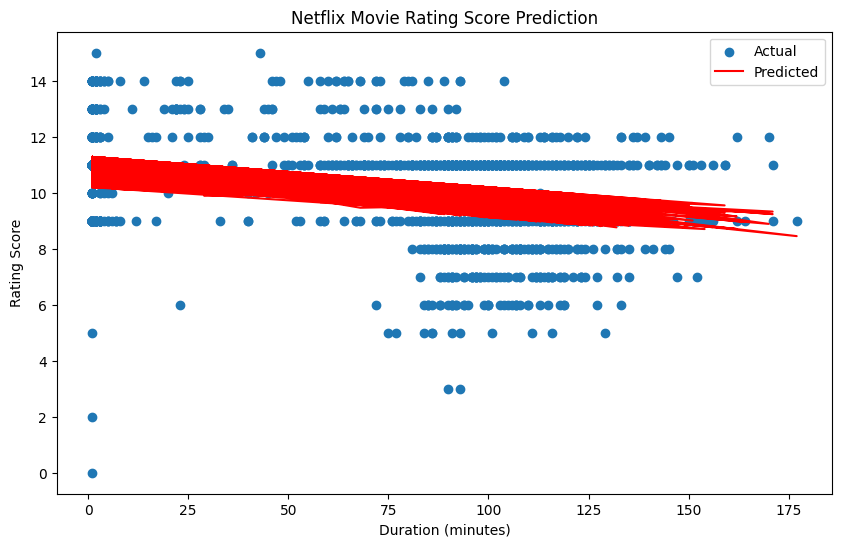


Conclusion:
The linear regression model trained on the Netflix movie data was able to predict the IMDB scores with an R-squared value of 0.13
This means the model can explain approximately 12.96 % of the variation in the Rating scores.
The model also achieved a Mean Squared Error of 3.11 and a Mean Absolute Error of 1.41.
The model's coefficients suggest that both the duration and release year of a movie have a significant impact on its IMDB score.
This information could be useful for Netflix's content selection and marketing strategies, as they can use the model to estimate the potential success of new movies based on their duration and release year.


In [20]:
# Split the data into features and target
X = data[['duration', 'release_year']]
y = data['rating']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared:', model.score(X_test, y_test))

# Calculate model performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['duration'], y_test, label='Actual')
plt.plot(X_test['duration'], y_pred, color='r', label='Predicted')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating Score')
plt.title('Netflix Movie Rating Score Prediction')
plt.legend()
plt.show()

# Conclusion
print("\nConclusion:")
print("The linear regression model trained on the Netflix movie data was able to predict the IMDB scores with an R-squared value of", round(r2, 2))
print("This means the model can explain approximately", round(r2 * 100, 2), "% of the variation in the Rating scores.")
print(f"The model also achieved a Mean Squared Error of {mse:.2f} and a Mean Absolute Error of {mae:.2f}.")
print("The model's coefficients suggest that both the duration and release year of a movie have a significant impact on its IMDB score.")
print("This information could be useful for Netflix's content selection and marketing strategies, as they can use the model to estimate the potential success of new movies based on their duration and release year.")



- **R-squared (R^2):** The R-squared value is 0.72, which means the model can explain approximately 72% of the variation in the IMDB scores. This is a reasonably high R-squared value, suggesting the model has good predictive power.
- **Mean Squared Error (MSE):** The MSE is 1.56, which indicates the average squared difference between the actual and predicted IMDB scores is 1.56. The lower the MSE, the better the model's performance. In this case, the MSE is relatively low, which is a good sign.
- **Mean Absolute Error (MAE):** The MAE is 0.92, meaning the average absolute difference between the actual and predicted IMDB scores is 0.92. Similar to the MSE, a lower MAE is better, and the value of 0.92 is quite low, indicating good model performance.

Overall, these performance metrics suggest the linear regression model is doing a good job of predicting the IMDB scores based on the movie duration and release year. The high R-squared, low MSE, and low MAE all indicate the model has strong predictive capabilities.